### 任务说明：

- 利用 **金融数据** 来预测贷款用户是否会逾期
- 其中，**“status”** 是结果标签：**0** 表示未逾期，**1** 表示逾期

### 任务要求：

- 数据切分方式：**三七分**
- 其中，测试集 **30%**，训练集 **70%**，随机种子设置为 **2019**

### 任务实现：（2 Days）

- 对数据进行探索和分析 **EDA**
- 数据类型的分析
- 无关特征的删除
- 数据类型的转换
- 缺失值的处理
- ......

### 分析步骤：
###### 1. 数据集加载并预览原始数据
###### 2. 对数据进行预处理（Preprocessing）：
###### 2.1 无关特征的删除
###### 2.2 数据类型的转换
###### 2.3 缺失值的处理

### 1. 数据集加载并预览效果

In [1]:
import pandas as pd

In [2]:
# Unicode编码错误 UnicodeDecodeError    Traceback (most recent call last)
data = pd.read_csv("Dataset/data.csv")
# 编码格式的问题 需手动设定为"UTF-8"

In [3]:
print(data.shape) # 观察数据的大小 4754行 90列

(4754, 90)


In [4]:
data.head(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


In [5]:
# 观察各列的属性名称
data.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

### 2. 对数据进行预处理（Preprocessing）

###### 2.1 无关特征的删除

In [6]:
data['bank_card_no']

0       卡号1
1       卡号1
2       卡号1
3       卡号1
4       卡号1
5       卡号1
6       卡号1
7       卡号1
8       卡号1
9       卡号1
10      卡号1
11      卡号1
12      卡号1
13      卡号1
14      卡号1
15      卡号1
16      卡号1
17      卡号1
18      卡号1
19      卡号1
20      卡号1
21      卡号1
22      卡号1
23      卡号1
24      卡号1
25      卡号1
26      卡号1
27      卡号1
28      卡号1
29      卡号1
       ... 
4724    卡号1
4725    卡号1
4726    卡号1
4727    卡号1
4728    卡号1
4729    卡号1
4730    卡号1
4731    卡号1
4732    卡号1
4733    卡号1
4734    卡号1
4735    卡号1
4736    卡号1
4737    卡号1
4738    卡号1
4739    卡号1
4740    卡号1
4741    卡号1
4742    卡号1
4743    卡号1
4744    卡号1
4745    卡号1
4746    卡号1
4747    卡号1
4748    卡号1
4749    卡号1
4750    卡号1
4751    卡号1
4752    卡号1
4753    卡号1
Name: bank_card_no, Length: 4754, dtype: object

In [7]:
data['source']

0       xs
1       xs
2       xs
3       xs
4       xs
5       xs
6       xs
7       xs
8       xs
9       xs
10      xs
11      xs
12      xs
13      xs
14      xs
15      xs
16      xs
17      xs
18      xs
19      xs
20      xs
21      xs
22      xs
23      xs
24      xs
25      xs
26      xs
27      xs
28      xs
29      xs
        ..
4724    xs
4725    xs
4726    xs
4727    xs
4728    xs
4729    xs
4730    xs
4731    xs
4732    xs
4733    xs
4734    xs
4735    xs
4736    xs
4737    xs
4738    xs
4739    xs
4740    xs
4741    xs
4742    xs
4743    xs
4744    xs
4745    xs
4746    xs
4747    xs
4748    xs
4749    xs
4750    xs
4751    xs
4752    xs
4753    xs
Name: source, Length: 4754, dtype: object

In [8]:
data['custid']

0       2791858
1        534047
2       2849787
3       1809708
4       2499829
5        518072
6       1205125
7       1129897
8       2599411
9       1413051
10       321061
11       750939
12      1169544
13       193188
14      1780401
15       999803
16       203427
17       829745
18       818730
19      2318583
20      2770676
21      2763960
22      1272880
23       800080
24       654993
25       140303
26       148742
27       713652
28      3051745
29      1870891
         ...   
4724    3401661
4725    3089430
4726    2123865
4727     295148
4728    2944213
4729    1757011
4730    3380919
4731    1517438
4732    3382649
4733    2867902
4734    2854394
4735    2722837
4736    3205825
4737      11985
4738     471607
4739    3196970
4740    2154764
4741     490919
4742    2404717
4743    2475139
4744    1039579
4745    3361286
4746     692541
4747    1886940
4748    1663311
4749    3269862
4750     270952
4751    2425913
4752     471395
4753    1881943
Name: custid, Length: 47

In [9]:
data[['trade_no', 'id_name', 'Unnamed: 0']]

,trade_no,id_name,Unnamed: 0
0,20180507115231274000000023057383,蒋红,5
1,20180507121002192000000023073000,崔向朝,10
2,20180507125159718000000023114911,王中云,12
3,20180507121358683000000388283484,何洋洋,13
4,20180507115448545000000388205844,赵洋,14
5,20180507121233054000000388275132,刘成,15
6,20180507121931540000000388298915,周雨浓,16
7,20180507124659235000000023105807,NaN,18
8,20180507115855621000000388224458,周琰龙,20
9,20180504155156296000000021138084,马晓辉,26


对以上字段进行 **drop** 删除操作！！

**bank_card_no** 、 **source** 取值没有区分度，所以进行删除！

**trade_no** 、 **id_name** 、 **Unnamed: 0** 、 **custid** 和 **预测** 没有关联，所以进行删除！

### Note!
(1) **axis 0** 表明用标签序列调用 **drop** 会从**行标签**删除值

(2) **drop** 函数会修改 Series 或 DataFrame 的大小或形状，可以就地修改对象，不会返回新 的对象，所以，应该小心使用 **inplace**， 因为它会销毁所有被删除的数据！！！

In [10]:
data.drop(['bank_card_no', 'source', 'trade_no', 'id_name', 'Unnamed: 0', 'custid'], axis=1, inplace=True)

In [15]:
# data.drop(['custid'], axis=1, inplace=True)

In [11]:
print(data.shape)

(4754, 84)


In [12]:
# 没有考虑时间序列，对日期属性做删除操作
data.drop(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], axis=1, inplace=True)

In [13]:
print(data.shape)

(4754, 81)


###### 2.2 数据类型转换

In [14]:
# 字符类型的特征处理
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [15]:
dic = {}
for i, val in enumerate(list(data['reg_preference_for_trad'].unique())): # 复习 enumerate 操作
    dic[val] = i

In [16]:
dic

{nan: 5, '一线城市': 0, '三线城市': 1, '二线城市': 3, '其他城市': 4, '境外': 2}

In [17]:
list(data['reg_preference_for_trad'].unique())# 提取唯一的特征值

['一线城市', '三线城市', '境外', '二线城市', '其他城市', nan]

In [18]:
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic) # 复习 map 操作

In [19]:
print(type(data['reg_preference_for_trad']))

<class 'pandas.core.series.Series'>


In [20]:
data['reg_preference_for_trad']

0       0
1       0
2       0
3       1
4       0
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      2
17      0
18      2
19      0
20      0
21      0
22      2
23      1
24      0
25      2
26      0
27      1
28      0
29      0
       ..
4724    0
4725    0
4726    2
4727    0
4728    0
4729    0
4730    1
4731    1
4732    0
4733    3
4734    2
4735    0
4736    0
4737    0
4738    0
4739    1
4740    0
4741    0
4742    0
4743    1
4744    0
4745    1
4746    0
4747    2
4748    0
4749    0
4750    0
4751    0
4752    0
4753    0
Name: reg_preference_for_trad, Length: 4754, dtype: int64

###### 2.3 缺失值处理

In [21]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        print('%.4f'%(summ*100/4754), '%',  '<==>', feature)

0.0421 % <==> low_volume_percent
0.0421 % <==> middle_volume_percent
0.0631 % <==> trans_amount_increase_rate_lately
0.0421 % <==> trans_activity_month
0.0421 % <==> trans_activity_day
0.0421 % <==> transd_mcc
0.1683 % <==> trans_days_interval_filter
0.0421 % <==> trans_days_interval
0.0421 % <==> regional_mobility
63.0627 % <==> student_feature
0.0421 % <==> number_of_trans_from_2011
0.0421 % <==> historical_trans_day
0.0421 % <==> rank_trad_1_month
0.0421 % <==> avg_consume_less_12_valid_month
0.0421 % <==> top_trans_count_last_1_month
2.1876 % <==> avg_price_top_last_12_valid_month
0.1683 % <==> trans_top_time_last_1_month
0.1683 % <==> trans_top_time_last_6_month
0.1683 % <==> consume_top_time_last_1_month
0.1683 % <==> consume_top_time_last_6_month
8.9609 % <==> cross_consume_count_last_1_month
0.3366 % <==> trans_fail_top_count_enum_last_1_month
0.3366 % <==> trans_fail_top_count_enum_last_6_month
0.3366 % <==> trans_fail_top_count_enum_last_12_month
0.5469 % <==> consume_mini_ti

###### 63.0627 % <==> student_feature 
- **student_feature** 缺失占比较多，用众数填充
- data['student_feature'].**fillna**(1.0, inplace = True)

In [22]:
data['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [23]:
data['student_feature'].fillna(1.0, inplace = True)

In [24]:
data['student_feature'].value_counts()

1.0    4752
2.0       2
Name: student_feature, dtype: int64

- 其余特征用 **mean均值** 填充

In [25]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        data[feature].fillna(data[feature].mean(), inplace = True)

### 3. 划分数据集

In [26]:
features = [x for x in data.columns if x not in ['status']]

In [27]:
features

['low_volume_percent',
 'middle_volume_percent',
 'take_amount_in_later_12_month_highest',
 'trans_amount_increase_rate_lately',
 'trans_activity_month',
 'trans_activity_day',
 'transd_mcc',
 'trans_days_interval_filter',
 'trans_days_interval',
 'regional_mobility',
 'student_feature',
 'repayment_capability',
 'is_high_user',
 'number_of_trans_from_2011',
 'historical_trans_amount',
 'historical_trans_day',
 'rank_trad_1_month',
 'trans_amount_3_month',
 'avg_consume_less_12_valid_month',
 'abs',
 'top_trans_count_last_1_month',
 'avg_price_last_12_month',
 'avg_price_top_last_12_valid_month',
 'reg_preference_for_trad',
 'trans_top_time_last_1_month',
 'trans_top_time_last_6_month',
 'consume_top_time_last_1_month',
 'consume_top_time_last_6_month',
 'cross_consume_count_last_1_month',
 'trans_fail_top_count_enum_last_1_month',
 'trans_fail_top_count_enum_last_6_month',
 'trans_fail_top_count_enum_last_12_month',
 'consume_mini_time_last_1_month',
 'max_cumulative_consume_later_1_m

In [28]:
import warnings
warnings.filterwarnings("ignore")
# 将数据集划分为训练集测试集
from sklearn.model_selection import train_test_split
# 预处理 标准化操作
from sklearn.preprocessing import StandardScaler
# 特征 与 标签
X = data[features]
y = data.status
# 训练集 和 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2018)

# 对特征进行归一化处理
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### 4. 模型选择

- **Logistic Regression** 逻辑回归模型
- **SVM** 模型
- **Decision Tree** 决策树模型

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
from sklearn import svm

In [32]:
svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 5. 模型调参

### 6. 模型评估

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测训练集和测试集
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率Accuracy
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率Precision
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率Recall
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC取值
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率] 训练集： 0.8031 测试集： 0.7814
[精准率] 训练集： 0.7020 测试集： 0.6374
[召回率] 训练集： 0.3729 测试集： 0.3036
[f1-score] 训练集： 0.4871 测试集： 0.4113
[auc值] 训练集： 0.8193 测试集： 0.7666


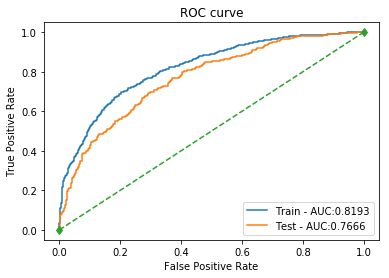

In [37]:
# 逻辑回归
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8046 测试集： 0.7772
[精准率] 训练集： 0.7822 测试集： 0.6614
[召回率] 训练集： 0.3058 测试集： 0.2340
[f1-score] 训练集： 0.4397 测试集： 0.3457
[auc值] 训练集： 0.8174 测试集： 0.7761


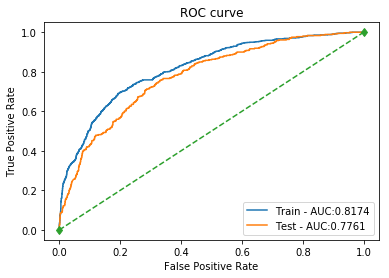

In [38]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8281 测试集： 0.7526
[精准率] 训练集： 0.9746 测试集： 0.5341
[召回率] 训练集： 0.3225 测试集： 0.1309
[f1-score] 训练集： 0.4847 测试集： 0.2103
[auc值] 训练集： 0.9443 测试集： 0.7118


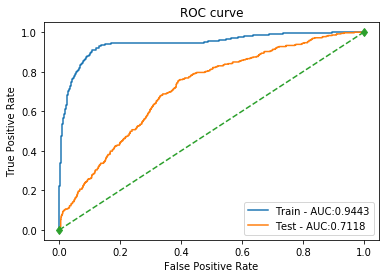

In [39]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8386 测试集： 0.7786
[精准率] 训练集： 0.9046 测试集： 0.6777
[召回率] 训练集： 0.3981 测试集： 0.2284
[f1-score] 训练集： 0.5529 测试集： 0.3417
[auc值] 训练集： 0.9141 测试集： 0.7500


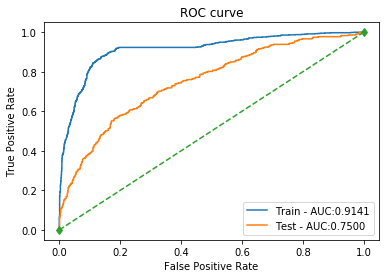

In [40]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7220 测试集： 0.7225
[精准率] 训练集： 0.4364 测试集： 0.4364
[召回率] 训练集： 0.3741 测试集： 0.3538
[f1-score] 训练集： 0.4028 测试集： 0.3908
[auc值] 训练集： 0.6411 测试集： 0.6542


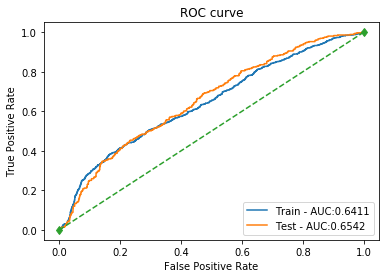

In [41]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8028 测试集： 0.7589
[精准率] 训练集： 0.6648 测试集： 0.5314
[召回率] 训练集： 0.4305 测试集： 0.3538
[f1-score] 训练集： 0.5226 测试集： 0.4247
[auc值] 训练集： 0.7734 测试集： 0.6932


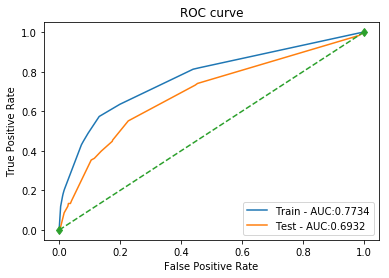

In [42]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

### Descussion

### Summary